In [28]:
import pymongo
import csv

# Coneccion a MongoDB
#client = pymongo.MongoClient("mongodb://localhost:27017/")
client = pymongo.MongoClient("localhost:27017")
# Acceso a la base de datos
db = client["Covid-19"]

# Creando la coleccion
collection = db['Covid-19']

# Tomar datos del archivo csv
datos = csv.DictReader(open('CCCba.csv'))

# subir los datos a Mongo
for fila in datos:
    collection.insert_one(fila)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
processDf = pd.read_csv('CCCba.csv')
processDf.head()

,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba
0,25/3/2020,21,49,0,NaN,NaN
1,26/3/2020,22,52,0,1,3
2,28/3/2020,24,56,0,2,4
3,29/3/2020,30,73,0,6,17
4,30/3/2020,30,80,0,0,7


In [30]:
#cargamos los datos de entrada
data = pd.read_csv("CCCba.csv")
# dimensiones y registros 
data.shape

(484, 6)

In [31]:
#son 484 registros con 6 columnas. 
data.head(483)

,Fecha,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado),Nuevos casos registrados Ciudad de Córdoba,Nuevos casos registrados Provincia de Córdoba
0,25/3/2020,21,49,0,NaN,NaN
1,26/3/2020,22,52,0,1,3
2,28/3/2020,24,56,0,2,4
3,29/3/2020,30,73,0,6,17
4,30/3/2020,30,80,0,0,7
...,...,...,...,...,...,...
478,17/7/2021,199345,444668,5857,622,1266
479,18/7/2021,199482,445141,5862,137,456
480,19/7/2021,199720,446235,5893,238,1064
481,20/7/2021,200028,447580,5927,308,1307


In [32]:
#estadísticas de nuestros datos
data.describe()

,Casos registrados Ciudad de Córdoba (acumulado),Casos registrados Provincia de Córdoba (acumulado),Fallecidos Provincia de Córdoba (acumulado)
count,484.000000,484.000000,484.000000
mean,54543.863636,119941.578512,1814.427686
std,57098.279392,126383.565299,1718.162758
min,21.000000,49.000000,0.000000
25%,795.000000,1669.500000,43.000000
50%,51724.500000,109389.500000,1796.500000
75%,75624.500000,173787.250000,2982.500000
max,201937.000000,451732.000000,5982.000000


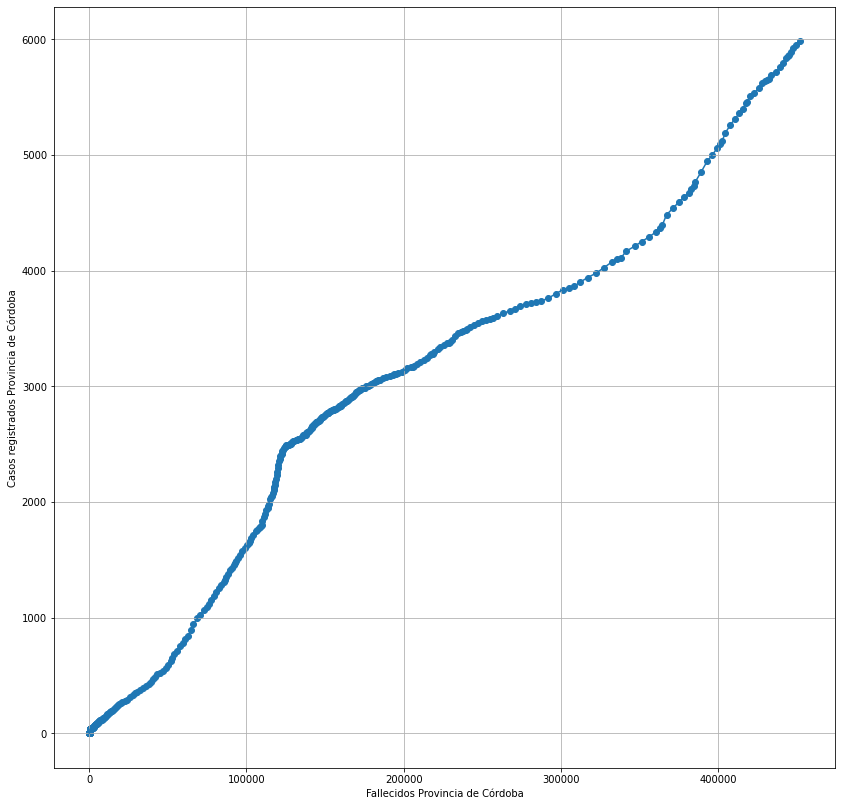

In [33]:
fig = plt.figure(figsize=(14,14))
plt.scatter(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'])
plt.plot(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'])
plt.xlabel('Fallecidos Provincia de Córdoba')
plt.ylabel('Casos registrados Provincia de Córdoba')
plt.grid()

In [34]:
processDf.keys()

Index(['Fecha', 'Casos registrados Ciudad de Córdoba (acumulado)',
       'Casos registrados Provincia de Córdoba (acumulado)',
       'Fallecidos Provincia de Córdoba (acumulado)',
       'Nuevos casos registrados Ciudad de Córdoba',
       'Nuevos casos registrados Provincia de Córdoba'],
      dtype='object')

In [35]:
Casos = processDf['Casos registrados Provincia de Córdoba (acumulado)'].values.reshape(-1,1)
Fallecidos = processDf['Fallecidos Provincia de Córdoba (acumulado)'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(Casos, Fallecidos)
Fallecidos_pred = linear_regressor.predict(Casos)
Fallecidos_pred

array([[ 217.23639765],
       [ 217.27636321],
       [ 217.32965062],
       [ 217.55612212],
       [ 217.64937509],
       [ 217.86252474],
       [ 217.94245585],
       [ 218.18224921],
       [ 218.36875515],
       [ 218.42204256],
       [ 218.48865182],
       [ 218.58190479],
       [ 218.6351922 ],
       [ 218.64851406],
       [ 218.71512332],
       [ 218.88830741],
       [ 219.3146067 ],
       [ 219.39453781],
       [ 219.44782523],
       [ 219.59436561],
       [ 219.67429672],
       [ 219.83415896],
       [ 219.91409008],
       [ 219.94073378],
       [ 220.08727416],
       [ 220.08727416],
       [ 220.10059602],
       [ 220.15388343],
       [ 220.18052713],
       [ 220.20717084],
       [ 220.22049269],
       [ 220.26045825],
       [ 220.2737801 ],
       [ 220.30042381],
       [ 220.30042381],
       [ 220.34038937],
       [ 220.51357345],
       [ 220.67343569],
       [ 220.68675754],
       [ 220.76668866],
       [ 220.78001051],
       [ 220.846

In [36]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$Casos registrados Provincia de Córdoba (acumulado) = %0.4f*Fallecidos Provincia de Córdoba (acumulado) %+0.4f$'%(m,c)
print(label)

$Casos registrados Provincia de Córdoba (acumulado) = 0.0133*Fallecidos Provincia de Córdoba (acumulado) +216.5836$


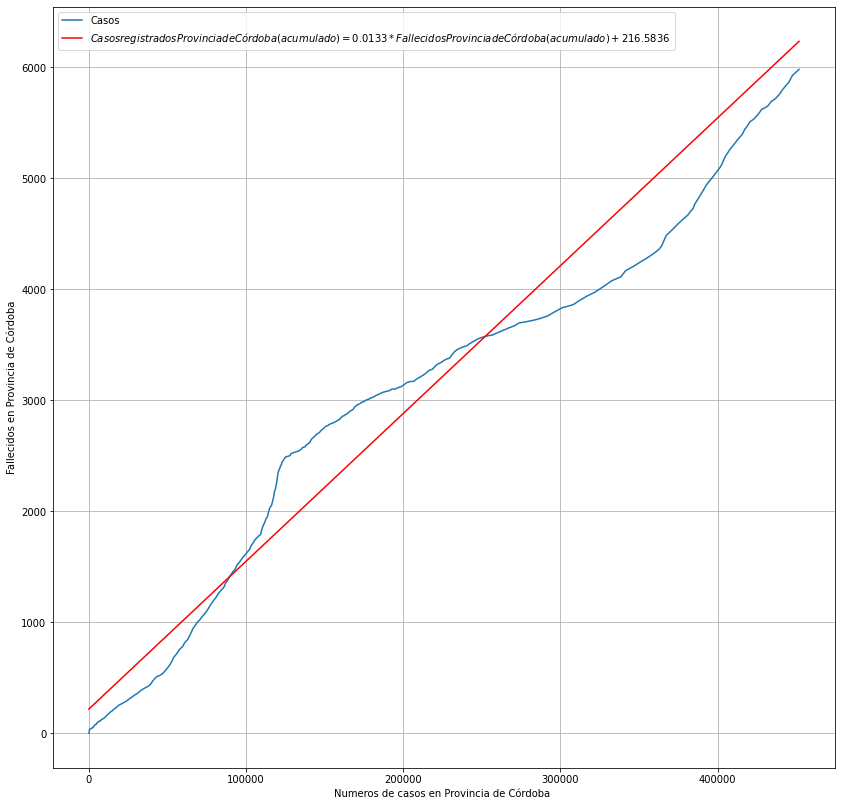

In [23]:
fig = plt.figure(figsize=(14,14))
plt.plot(processDf['Casos registrados Provincia de Córdoba (acumulado)'],processDf['Fallecidos Provincia de Córdoba (acumulado)'], label='Casos')
plt.plot(Casos, Fallecidos_pred, color='red', label=label)
plt.xlabel('Numeros de casos en Provincia de Córdoba ')
plt.ylabel('Fallecidos en Provincia de Córdoba')
plt.legend()
plt.grid()